<a href="https://colab.research.google.com/github/SaguPandya96/Licensed-Child-Care-Providers-and-Facilities/blob/master/Licensed_Child_Care_Providers_and_Facilities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.Import the libraries 

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Childcare_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Import CSV Data set Using Pandas 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np


In [12]:
import pandas as pd
url = '/content/Licensed_Child_Care_Providers_and_Facilities.csv'
Data1 = pd.read_csv(url)
Data1.head(5)

,License Number,County,Name,Name Reversed,Type of Child Care,Enforcement Action,Intent to Revoke,Street Address,City,State,Zip Code,Phone Number,Age Range,Age Group,Capacity,Opening Time,Closing Time,Special Conditions,Government Programs,Delaware STARS Level,Geocoded Location,Count
0,27390,Sussex,LISA STOECKEL,"STOECKEL, LISA",Licensed Family Child Care,NaN,NaN,22448 PETERKINS ROAD,GEORGETOWN,DE,19947,(302) 856-2651,6 months through 5 years.,Infant through Pre-School,9,7:30 AM,5:00 PM,NaN,Child Care Food Program,0,POINT (-75.325081 38.66056076),1
1,27399,New Castle,YMCA OF DELAWARE / CENTRAL BRANCH YMCA CHILDRE...,YMCA OF DELAWARE / CENTRAL BRANCH YMCA CHILDRE...,Licensed Child Care Center,NaN,NaN,501 WEST 11TH STREET,WILMINGTON,DE,19801,(302) 254-9622,6 weeks through 5 years.,Infant through Pre-School,99,6:45 AM,6:00 PM,NaN,Child Care Food Program;Nonprofit;Purchase of ...,5,POINT (-75.5514135 39.748761),1
2,27407,Kent,DOVER EDUCATIONAL & COMMUNITY CENTER,DOVER EDUCATIONAL & COMMUNITY CENTER,Licensed Child Care Center,Warning of Probation,Intent to Place on Warning of Probation,744 RIVER ROAD,DOVER,DE,19901,(302) 883-3092,1 year through 12 years.,Toddler through School-Age,59,6:00 AM,8:00 PM,NaN,Purchase of Care,0,POINT (-75.5158545 39.152538),1
3,27410,New Castle,ELIZABETH JOHNSON,"JOHNSON, ELIZABETH",Licensed Family Child Care,NaN,NaN,2011 WEST STREET,WILMINGTON,DE,19802,(302) 287-5733,6 weeks through 12 years.,Infant through School-Age,9,7:00 AM,5:00 PM,NaN,Child Care Food Program;Purchase of Care,0,POINT (-75.5426475 39.754116),1
4,27411,New Castle,JANEL DEMONIA,"DEMONIA, JANEL",Licensed Family Child Care,NaN,NaN,1113 CADE STREET,WILMINGTON,DE,19802,(302) 656-1344,6 weeks through 12 years.,Infant through School-Age,9,3:00 PM,11:00 PM,NaN,Private,0,POINT (-75.533895 39.742884),1


### Let’s explore the data a little bit by checking the number of rows and columns in our datasets.

In [13]:
Data1.shape

(1005, 22)

### Let's Check here Information of the dataset explaining which datatype.

In [15]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   License Number        1005 non-null   int64 
 1   County                1005 non-null   object
 2   Name                  1005 non-null   object
 3   Name Reversed         1005 non-null   object
 4   Type of Child Care    1005 non-null   object
 5   Enforcement Action    10 non-null     object
 6   Intent to Revoke      24 non-null     object
 7   Street Address        1005 non-null   object
 8   City                  1005 non-null   object
 9   State                 1005 non-null   object
 10  Zip Code              1005 non-null   int64 
 11  Phone Number          1005 non-null   object
 12  Age Range             1005 non-null   object
 13  Age Group             1005 non-null   object
 14  Capacity              1005 non-null   int64 
 15  Opening Time          1005 non-null   

### To see the statistical details of the dataset

In [16]:
Data1.describe()

,License Number,Zip Code,Capacity,Delaware STARS Level,Count
count,1.005000e+03,1005.000000,1005.000000,1005.000000,1005.0
mean,5.968706e+05,19824.040796,50.530348,1.537313,1.0
std,4.793050e+05,103.157730,63.682795,2.005434,0.0
min,2.739000e+04,19701.000000,5.000000,0.000000,1.0
25%,1.145190e+05,19713.000000,9.000000,0.000000,1.0
50%,5.285800e+05,19805.000000,12.000000,0.000000,1.0
75%,9.962730e+05,19941.000000,76.000000,3.000000,1.0
max,1.481094e+06,19977.000000,585.000000,5.000000,1.0


### Let's Check How many Object Unique In County 

In [17]:
Data1['County'].unique()


array(['Sussex', 'New Castle', 'Kent', 'NEW CASTLE', 'SUSSEX', 'KENT'],
      dtype=object)

### Let's Check How many Object Unique In Type Of Child Care 

In [20]:
Data1['Type of Child Care'].unique()

array(['Licensed Family Child Care', 'Licensed Child Care Center',
       'Licensed Large Family Child Care'], dtype=object)

Let's Check How many Object Unique In City 

In [21]:
Data1['City'].unique()

array(['GEORGETOWN', 'WILMINGTON', 'DOVER', 'NEW CASTLE', 'MIDDLETOWN',
       'MILTON', 'BEAR', 'MILLSBORO', 'NEWARK', 'HOCKESSIN', 'HARTLY',
       'BETHEL', 'FELTON', 'CAMDEN WYOMING', 'MILFORD', 'FRANKFORD',
       'LINCOLN', 'SEAFORD', 'FREDERICA', 'DELMAR', 'LEWES', 'CLAYMONT',
       'LAUREL', 'SELBYVILLE', 'DELAWARE CITY', 'MAGNOLIA', 'HARBESON',
       'DAGSBORO', 'SMYRNA', 'CLAYTON', 'GREENWOOD', 'BRIDGEVILLE',
       'TOWNSEND', 'HARRINGTON', 'BLADES', 'OCEAN VIEW', 'CHRISTIANA',
       'ELLENDALE', 'REHOBOTH BEACH', 'CAMDEN', 'NEWPORT', 'FARMINGTON',
       'ODESSA', 'LONG NECK'], dtype=object)

In [22]:
Data1['Government Programs'].unique()

array(['Child Care Food Program',
       'Child Care Food Program;Nonprofit;Purchase of Care',
       'Purchase of Care', 'Child Care Food Program;Purchase of Care',
       'Private', 'Child Care Food Program;Profit;Purchase of Care', nan,
       'Nonprofit', 'Child Care Food Program;Private;Purchase of Care',
       'Profit;Purchase of Care', 'Child Care Food Program;Private',
       'Nonprofit;Private', 'Nonprofit;Purchase of Care',
       'Private;Purchase of Care',
       'Child Care Food Program;Nonprofit;Private;Purchase of Care',
       'Child Care Food Program;Nonprofit',
       'Child Care Food Program;Private;Profit;Purchase of Care',
       'Private;Profit', 'Publicly Operated;Purchase of Care',
       'Nonprofit;Private;Purchase of Care'], dtype=object)

In [25]:
Data1['Age Group'].unique()

array(['Infant through Pre-School', 'Toddler through School-Age',
       'Infant through School-Age', 'Pre-School through School-Age',
       'Pre-School', 'Toddler through Pre-School', 'School-Age',
       'Infant through Other', 'Infant through Toddler',
       'Toddler through Other'], dtype=object)

### Let's Visualize The data set. Use of visualization packages .

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
sns.set(style = 'darkgrid')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


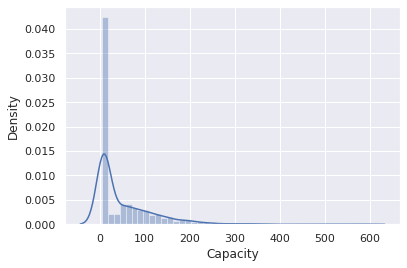

In [30]:
#Create Diistribution plot For Capacity 

sns.distplot(Data1.Capacity)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


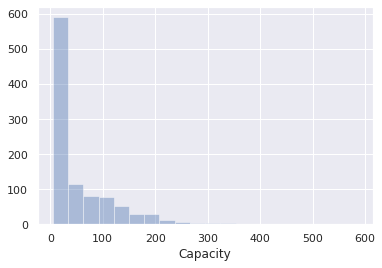

In [34]:
#Change the number of bins
sns.distplot(Data1.Capacity, bins=20, kde = False)
plt.show()

In [38]:
Data1.corr()

,License Number,Zip Code,Capacity,Delaware STARS Level,Count
License Number,1.000000,-0.000987,0.080665,0.035067,NaN
Zip Code,-0.000987,1.000000,-0.098190,-0.106561,NaN
Capacity,0.080665,-0.098190,1.000000,0.455767,NaN
Delaware STARS Level,0.035067,-0.106561,0.455767,1.000000,NaN
Count,NaN,NaN,NaN,NaN,NaN


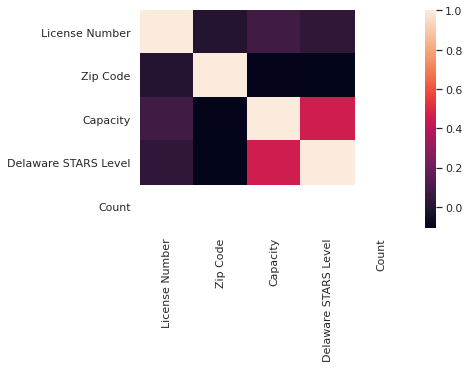

In [39]:
sns.heatmap(Data1.corr())

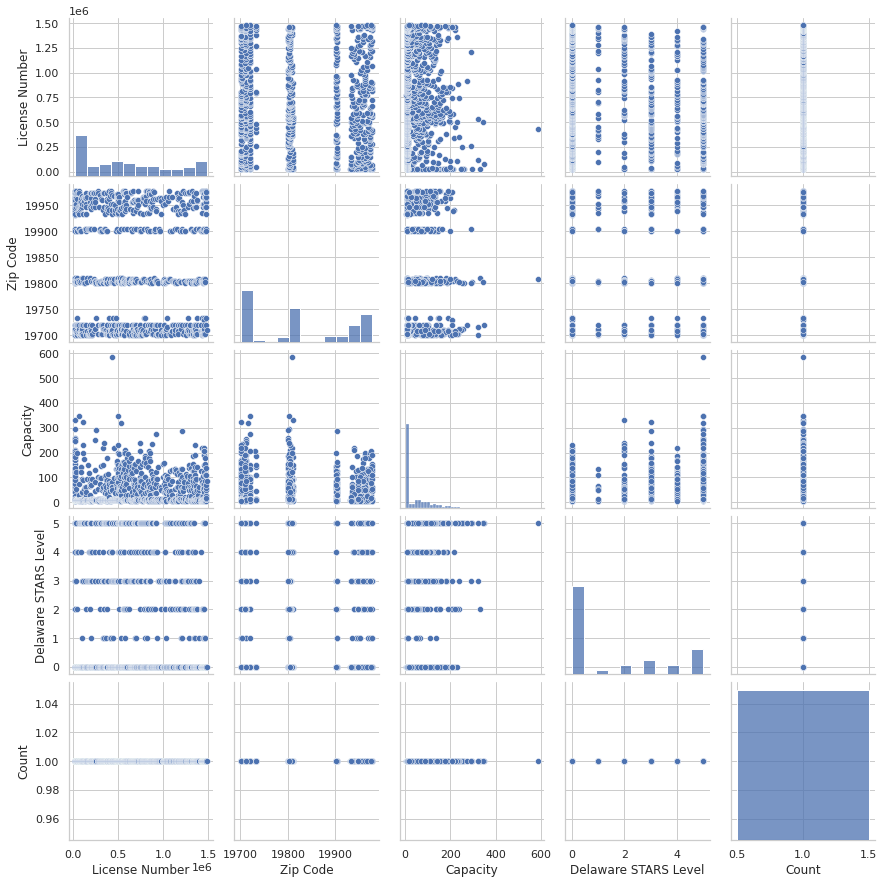

In [41]:
sns.pairplot(Data1)